In [1]:
!pip install YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Table of Contents
* [Libraries](#Libraries)

* [Introduction](#Introduction)
    * [Problem Statement](#Problem)
    * [Summary Findings](#Summary)

* [Visualization/EDA/Analysis](#visualization)
    * [Feature descriptions](#Feature)
    * [Data Loading and Descriptions](#Loading)
    * [EDA](#Analysis)

  
* [Modeling](#modelling)
    * [ML Random Forest](#RF)
        * [Standard classifier](#classifiers)
        * [Backtesting](#BT)
        * [Additional predictors](#AV)

    * [Statistical approach: Bayesian Model](#Bay)
        * [Bayesian Model with all significant variables](#Full)
        * [Bayesian Model with 3 most correlated variables](#Fewer)

    * [Deep learning approach](#DL)
        * [Training](#DL_TR)    
        * [Key findings](#DL_KF)    
      
* [Results](#Results)
        
* [Conclusion/Inferences](#Conc)
        
* [Future Work/ Scope of improvement](#FW)


## Libraries <a class="anchor" id="Libraries"></a>


In [2]:
import pandas as pd
import sklearn
from yahoofinancials import YahooFinancials
from datetime import datetime
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

# Import libraries
import pandas as pd
import math
import numpy as np
import tensorflow as tf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, LSTM, SimpleRNN, GRU, Bidirectional, Dropout, TimeDistributed, MultiHeadAttention, LayerNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/Shared drives/109B Project/")
#os.listdir('data/')

Mounted at /content/gdrive


In [4]:
# measure notebook runtime
time_start = time.time()

## Introduction <a class="anchor" id="Introduction"></a>
In this project, we aim to forecast the S&P 500 Index using diverse macroeconomic indicators. To achieve this aim, we have employed a wide range of machine learning, deep learning, and statistical approaches, each offering unique advantages and capabilities. 

## Problem Statement <a class="anchor" id="Problem"></a>

The stock market's inherent volatility renders accurate predictions a challenging endeavor. Consequently, individual traders cannot rely solely on their intuition to make profitable decisions. Thus, a precise prediction method is essential for establishing a dependable algorithmic approach.

The key questions to address in our project are: Do macroeconomic and technical indicators influence the S&P 500 Index? If so, to what extent can we accurately predict the direction of the S&P 500 Index using contemporary data models?

## Summary Findings <a class="anchor" id="Summary"></a>
After analyzing various models, including machine learning, deep learning, and statistical approaches, we discovered that the Gated Recurrent Unit (GRU) model provides the best forecasting results for the S&P 500 Index, with an accuracy of 68%. This outperforms the mean accuracy of 62% observed for the S&P 500 Index during the same period.

The GRU model's potential advantage in time series forecasting compared to Long Short-Term Memory (LSTM) and Transformer models stems from several factors. GRUs feature a simpler architecture than LSTMs, employing fewer gates, which can result in quicker training times and reduced computational complexity. 
Moreover, GRUs have demonstrated comparable performance to LSTMs in various sequence-to-sequence prediction tasks, suggesting that their streamlined architecture does not sacrifice predictive capabilities. 

In contrast to Transformers, GRUs are better equipped to handle long-range dependencies in time series data due to their innate sequential nature. Transformers depend on self-attention mechanisms that can struggle to capture dependencies in lengthy sequences, particularly when the data is noisy or contains complex patterns. As a result, the GRU model may provide a more efficient and effective solution for time series forecasting in specific scenarios.

## Features Description <a class="anchor" id="Feature"></a>

1) SP500 – Price of S&P 500 at respective month (Units: U.S. Dollars)

2) PMI (Purchasing Managers' Index): This is an index that measures the activity level  of purchasing managers in the manufacturing and service sector. 
https://www.quandl.com/data/ISM-Institute-for-Supply-Management 

3)PPI (Producer Price Index): It measures the average change over time in the prices  received by domestic producers for their output. 
(https://fred.stlouisfed.org/series/PPIACO) 

4)Building Permits: It is an indicator of future construction activity. 
https://www.census.gov/construction/nrc/historical_data/index.html 

5)CPI (Consumer Price Index): It measures the average change over time in the prices  paid by urban consumers for a market basket of consumer goods and services. https://fred.stlouisfed.org/series/CPIAUCSL 

6)UMCSI (University of Michigan Consumer Sentiment Index): It measures consumers'  attitudes and expectations about the economy.
https://fred.stlouisfed.org/series/UMCSENT 

7) US 10-Year Futures: It is a futures contract that is based on the performance of the 10-year US Treasury Note.
https://www.investing.com/rates-bonds/us-10-yr-t-note-historical-data


8)Fed Fund Interest Rate: It is the interest rate at which banks lend money to each other overnight.   https://fred.stlouisfed.org/series/FEDFUNDS

9)Yield Curve: It is a graph that plots the yields of bonds having equal credit quality, but differing maturity dates. The yield curve is a reliable predictor of future economic  activity and stock market performance. 


## Data Loading and Description <a class="anchor" id="Loading"></a>



In [5]:
sp500_monthly = pd.read_csv("data/allData.csv")
sp500_monthly.drop(columns=['Price','Open','High','Low','Volume'], inplace=True)

In [6]:
sp500_monthly.columns

Index(['high', 'low', 'open', 'close', 'volume', 'adjclose', 'date',
       'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO', 'UMCSENT', 'Change %',
       'target'],
      dtype='object')

In [7]:
#copying for EDA purpose and baseline models.
df_eda=sp500_monthly.copy()

,high,low,open,close,volume,adjclose,date,CPIAUCSL,FEDFUNDS,PERMIT,PPIACO,UMCSENT,Change %,target
0,360.589996,319.829987,353.399994,329.079987,3793250000,329.079987,1990-01-01,127.500,8.23,1748.0,114.900,93.0,-2.76%,0
1,336.089996,322.100006,329.079987,331.890015,2961970000,331.890015,1990-02-01,128.000,8.24,1329.0,114.400,89.5,-0.61%,1
2,344.489990,331.079987,331.890015,339.940002,3283280000,339.940002,1990-03-01,128.600,8.28,1246.0,114.200,91.3,-1.01%,1
3,347.299988,327.760010,339.940002,330.799988,2801220000,330.799988,1990-04-01,128.900,8.26,1136.0,114.100,93.9,-2.29%,0
4,362.260010,330.799988,330.799988,361.230011,3596680000,361.230011,1990-05-01,129.100,8.18,1067.0,114.600,90.6,2.88%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,4119.279785,3584.129883,3936.729980,3585.620117,94241020000,3585.620117,2022-09-01,296.539,2.56,1564.0,267.898,58.6,-3.95%,0
393,3905.419922,3491.580078,3609.780029,3871.979980,95823760000,3871.979980,2022-10-01,297.987,3.08,1512.0,265.061,59.9,-1.33%,1
394,4080.110107,3698.149902,3901.790039,4080.110107,92671910000,4080.110107,2022-11-01,298.598,3.78,1351.0,263.157,56.8,2.36%,1
395,4100.959961,3764.489990,4087.139893,3839.500000,85249330000,3839.500000,2022-12-01,298.990,4.10,1337.0,257.921,59.7,-0.54%,0


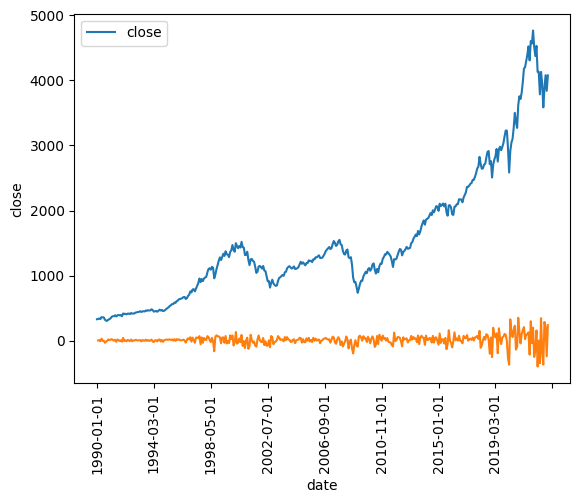

In [8]:
#Plotting tie series - close price 
sp500_monthly.plot.line(x= 'date',y='close',rot=90)
#print daily variation
data_diff = sp500_monthly['close'] - sp500_monthly['close'].shift(1)
sns.lineplot(data_diff[1:])
#Printing sample  data
display(sp500_monthly)

In [9]:
p_value = sm.tsa.stattools.adfuller(sp500_monthly["close"])[1]
print("Augmented Dickey-Fuller to determine if S&P 500 close prices is stationary",p_value)

print("If we take 5% as the confidence level in our hypothesis of Dickey Fuller test, we can see that pvalue is much greater than 0.05 so the S&P 500 is not stationary.")


Augmented Dickey-Fuller to determine if S&P 500 close prices is stationary 0.9989267705339215
If we take 5% as the confidence level in our hypothesis of Dickey Fuller test, we can see that pvalue is much greater than 0.05 so the S&P 500 is not stationary.


In [10]:
# creating binary predictor for S&P 500 - To make the data stationary, it was necessary to create a new dependent variable, which was calculated from the current monthly price minus the previous month’s price. 
sp500_monthly['target'] = (sp500_monthly["open"]< sp500_monthly["close"]).astype(int)  # price went up


In [11]:
# descriptive stats for S&P 500 data and corresponding features
display(sp500_monthly.describe())
print(sp500_monthly.index.max()-sp500_monthly.index.min(), "No. of days :","Max:",sp500_monthly.index.max(),"Min:",sp500_monthly.index.min())

,high,low,open,close,volume,adjclose,CPIAUCSL,FEDFUNDS,PERMIT,PPIACO,UMCSENT,target
count,397.000000,397.000000,397.000000,397.000000,3.970000e+02,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1555.674535,1450.265491,1504.042136,1512.314357,5.072774e+10,1512.314357,201.122375,2.709345,1344.372796,164.287511,86.151134,0.627204
std,1037.577788,961.634651,1001.240602,1005.579606,3.755697e+10,1005.579606,43.335309,2.365644,407.513465,39.014914,13.064055,0.484159
min,319.690002,294.510010,303.989990,304.000000,2.687280e+09,304.000000,127.500000,0.050000,513.000000,114.100000,50.000000,0.000000
25%,930.169983,815.690002,885.140015,885.760010,1.355197e+10,885.760010,162.200000,0.190000,1069.000000,127.200000,76.800000,0.000000
50%,1290.680054,1205.459961,1251.000000,1255.819946,5.048562e+10,1255.819946,201.900000,2.160000,1349.000000,165.400000,88.800000,1.000000
75%,2018.189941,1871.910034,1937.089966,1960.229980,8.050076e+10,1960.229980,236.918000,5.200000,1651.000000,197.900000,95.500000,1.000000
max,4818.620117,4560.000000,4778.140137,4766.180176,1.621854e+11,4766.180176,300.536000,8.290000,2263.000000,280.251000,112.000000,1.000000


396 No. of days : Max: 396 Min: 0


In [12]:
sp500_monthly.columns

Index(['high', 'low', 'open', 'close', 'volume', 'adjclose', 'date',
       'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO', 'UMCSENT', 'Change %',
       'target'],
      dtype='object')

## Exploratory Data Analysis <a class="anchor" id="Analysis"></a>



During the exploratory data analysis (EDA) phase, we investigated over 30 years of monthly data spanning from 1990 to 2022, aiming to uncover insights about the dataset. We examined the dataset for any missing values and found no null entries. The heatmap of null values confirmed the absence of any missing data, which is a positive indicator for our analysis.

Given the lack of null values in the dataset, there is no need for preprocessing to handle missing data. This complete dataset allows for more accurate and reliable predictions, streamlining the modeling process.

In [13]:
df_eda.isna().sum()

high        0
low         0
open        0
close       0
volume      0
adjclose    0
date        0
CPIAUCSL    0
FEDFUNDS    0
PERMIT      0
PPIACO      0
UMCSENT     0
Change %    0
target      0
dtype: int64

<Axes: >

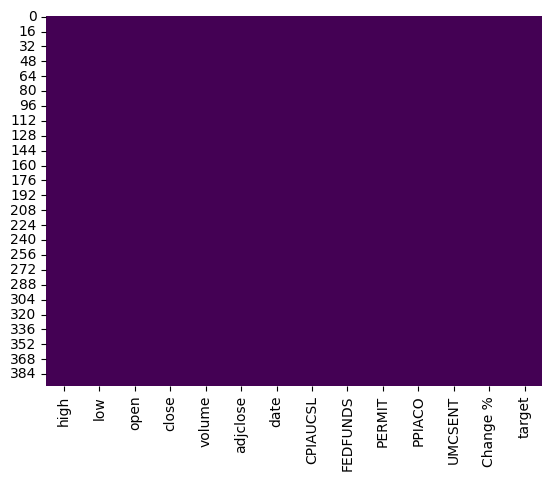

In [14]:
#Heat Map for Null Check in the data set
sns.heatmap(df_eda.isnull(), cmap='viridis', cbar=False)

The next step involves identifying any variables that exhibit a relationship with the target variable. During the EDA process, we determined the target variable to be the closing value. We conducted a correlation matrix analysis on all variables, excluding the date variable, as it cannot be measured for collinearity. Based on the correlation heatmap, we found that high, low, open, volume, adjclose, CPIAUCSL, FEDFUNDS, PERMIT, PPIACO, and UMCSENT exhibit collinearity.

It is important to note that high, low, open, and adjclose values are closely related to the closing value, which can lead to multicollinearity issues that negatively impact our prediction results. Therefore, we can remove these multicollinear variables to improve our model's performance.

---



In [15]:
#To display the columns of further analysis
df_eda.columns

Index(['high', 'low', 'open', 'close', 'volume', 'adjclose', 'date',
       'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO', 'UMCSENT', 'Change %',
       'target'],
      dtype='object')

In [16]:
#columns for correlation matrix 
cols_for_heatmap=['high', 'low', 'open', 'close', 'volume', 'adjclose', 'date',
       'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO',
       'UMCSENT', 'target',  'Change %']

<ipython-input-17-a006aeaec154>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=df_eda[cols_for_heatmap].corr()


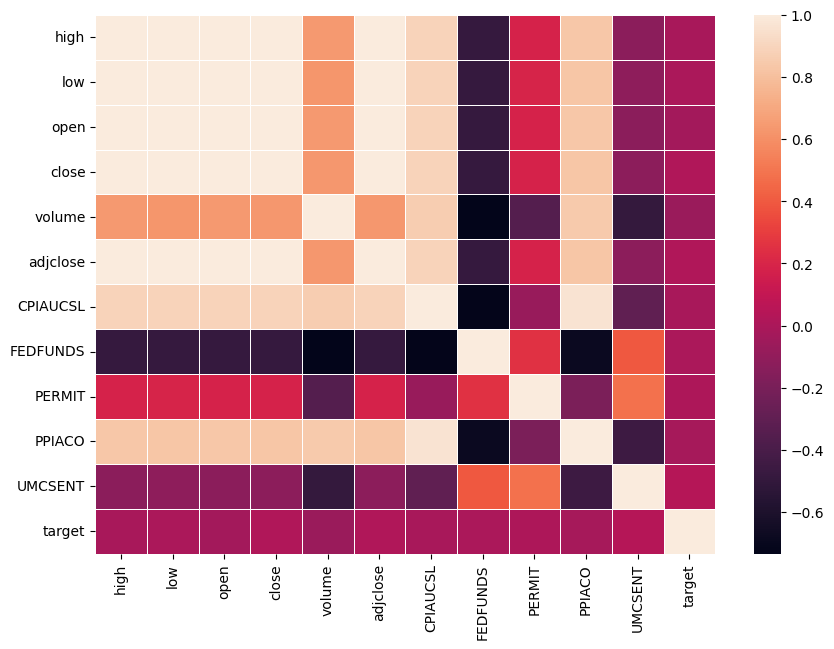

In [17]:
#correlation matrix 
plt.figure(figsize = (10,7))
corr1=df_eda[cols_for_heatmap].corr()
ax = sns.heatmap(corr1, annot=False, linewidths=.6)

The multicollinear variables identified high, open, adjclose,low are removed from the dataset. The Variation Inflation Factor is calculated for the dataset without multicollinear variables.Before the VIF Calculation, the Change% is converted to float percentage from String values. A Bar plot is plotted against the VIF values and found that FEDFUNDS, PERMIT,  UMCSENT,Change %, VOLUME has low VIF which indicates there is no multicollinearity. Although PPIACO and CPCPIAUCSL are showing multicollinearity, these two variables are included as independent variable for modeling as this multicollinearity wont impact the deep learning models. Also Performed   pca components analysis, it is found that  PERMIT, UMSCENT, FEDFUNDS, CPIAUCSL, VOLUME contributes more variation in that pricipal components.

In [18]:
df_pca=df_eda.copy()

In [19]:
#dropping date as it not required for pca and multicollinearity test
df_pca.drop(columns=['date','high','open','adjclose','low'], inplace=True)

In [20]:
 #remove the % and converting change % to float
df_pca['Change %'] = df_pca['Change %'].str.rstrip('%').astype(float)


In [21]:
#selection of independent variables
cols_for_vif=df_pca[['volume',
       'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO',
       'UMCSENT', 'Change %']]

In [22]:
# Add a constant term to the independent variables
X = sm.add_constant(cols_for_vif)

In [23]:
# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif["features"] = X.columns[1:]

In [24]:
# Print the VIF results
print(vif)

   VIF Factor  features
0    7.288368    volume
1   47.261550  CPIAUCSL
2    2.741105  FEDFUNDS
3    2.007382    PERMIT
4   33.477864    PPIACO
5    2.648666   UMCSENT
6    1.031013  Change %


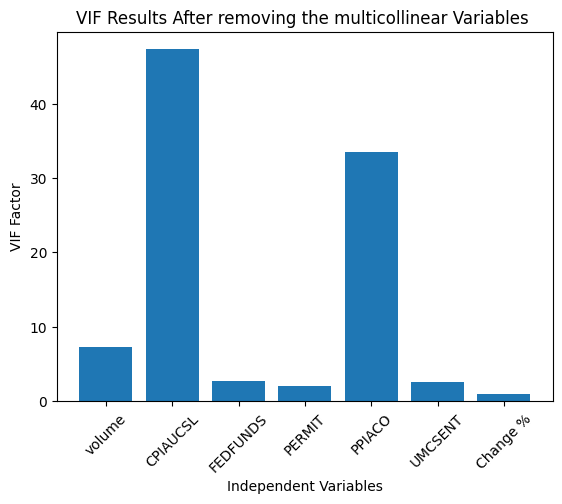

In [25]:
# Create a bar chart of the VIF results
plt.bar(vif["features"], vif["VIF Factor"])
plt.title("VIF Results After removing the multicollinear Variables ")
plt.xlabel("Independent Variables")
plt.ylabel("VIF Factor")
plt.xticks(rotation=45)
plt.show()


In [26]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

In [27]:
#Perform PCA without multicollinearity variables identified above
pca = PCA(n_components=2)
pca.fit(X_scaled)
coefficients = pd.DataFrame(data=pca.components_.T, columns=['PC1', 'PC2'], index=df_pca.columns)

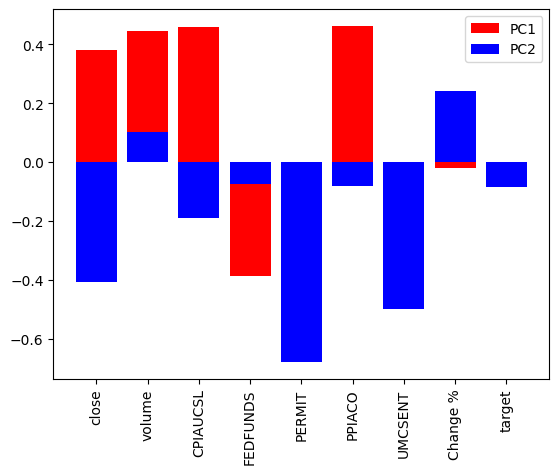

In [28]:
# plot the bar chart of the coefficients
plt.bar(x=coefficients.index, height=coefficients['PC1'], color='r', label='PC1')
plt.bar(x=coefficients.index, height=coefficients['PC2'], color='b', label='PC2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Based on the EDA analysis conducted, we concluded that PPICAO, PERMIT, VOLUME, UMCSENT, CPIAUCSL, and FEDFUNDS are potential variables influencing the closing value. Scatter plots were generated to identify any observable trends. The plots reveal a strong and positive linear relationship between the target variable (closing value) and CPIAUCSL, FEDFUNDS, PERMIT, and UMCSENT. In contrast, VOLUME do not exhibit a linear relationship with the target variable.

Furthermore, we observed no potential outliers influenced by the predictors, and the data points are clustered together, indicating a consistent pattern in the relationships between the variables.


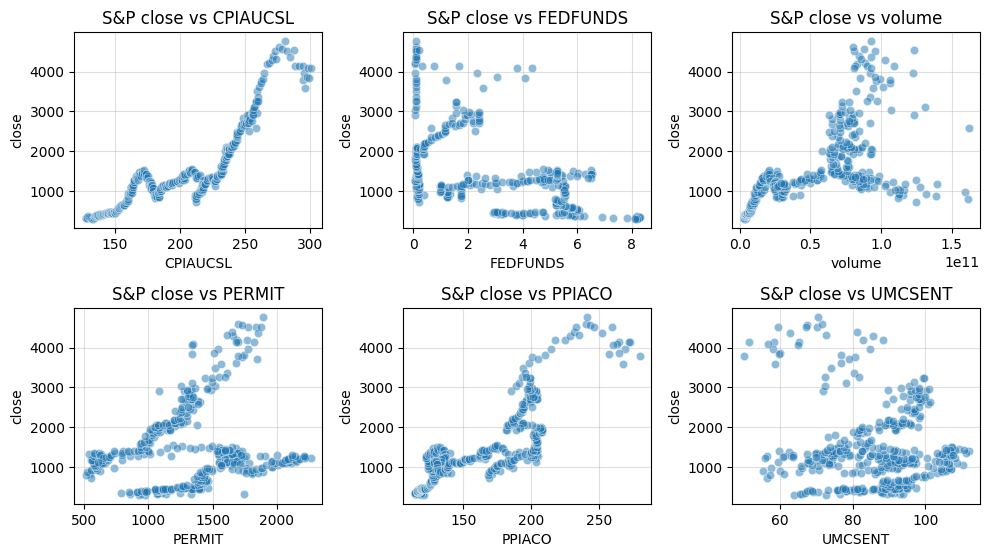

In [29]:
#Outliers check and trends analysis
fig, axs = plt.subplots(3,3, figsize=(10, 8))

plt1 = sns.scatterplot(ax=axs[0,0], x='CPIAUCSL', y='close', data=df_eda, alpha=0.5)
plt1.set_title("S&P close vs CPIAUCSL", fontsize=12)
plt1.set_xlabel("CPIAUCSL", fontsize=10)
plt1.set_ylabel("close", fontsize=10)
plt1.grid(":", alpha=0.4)

plt2 = sns.scatterplot(ax=axs[0,1], x='FEDFUNDS', y='close', data=df_eda, alpha=0.5)
plt2.set_title("S&P close vs FEDFUNDS", fontsize=12)
plt2.set_xlabel("FEDFUNDS", fontsize=10)
plt2.set_ylabel("close", fontsize=10)
plt2.grid(":", alpha=0.4)

plt3 = sns.scatterplot(ax=axs[0,2], x='volume', y='close', data=df_eda, alpha=0.5)
plt3.set_title("S&P close vs volume", fontsize=12)
plt3.set_xlabel("volume", fontsize=10)
plt3.set_ylabel("close", fontsize=10)
plt3.grid(":", alpha=0.4)

plt4 = sns.scatterplot(ax=axs[1,0], x='PERMIT', y='close', data=df_eda, alpha=0.5)
plt4.set_title("S&P close vs PERMIT", fontsize=12)
plt4.set_xlabel("PERMIT", fontsize=10)
plt4.set_ylabel("close", fontsize=10)
plt4.grid(":", alpha=0.4)

plt5 = sns.scatterplot(ax=axs[1,1], x='PPIACO', y='close', data=df_eda, alpha=0.5)
plt5.set_title("S&P close vs PPIACO", fontsize=12)
plt5.set_xlabel("PPIACO", fontsize=10)
plt5.set_ylabel("close", fontsize=10)
plt5.grid(":", alpha=0.4)

plt6 = sns.scatterplot(ax=axs[1,2], x='UMCSENT', y='close', data=df_eda, alpha=0.5)
plt6.set_title("S&P close vs UMCSENT", fontsize=12)
plt6.set_xlabel("UMCSENT", fontsize=10)
plt6.set_ylabel("close", fontsize=10)
plt6.grid(":", alpha=0.4)

fig.delaxes(axs[2,2])
fig.delaxes(axs[2,1])
fig.delaxes(axs[2,0])

fig.tight_layout()
plt.show();

## Modelling <a class="anchor" id="modelling"></a>
In this project, we aim to forecast the S&P 500 Index using diverse macroeconomic indicators. To achieve this aim, we have employed a wide range of machine learning, deep learning, and statistical approaches, each offering unique advantages and capabilities. More than 60 percent of trading activities with different assets (such as stocks, index futures, commodities) are not made by “human being” traders anymore, instead relying on automated trading. Machine Learning is the new way of many useful real-life applications. Financial trading is one of these, and it’s used very often in this sector. An important concept about Machine Learning is that we do not need to write code for every kind of possible rules. It adapts. This is because every model associated with Machine Learning learns from the data itself, and then can be later used to predict unseen new data.


### Machine learning approach: Random Forest <a class="anchor" id="RF"></a>
Why Random Forest? - Random Forests helps in overcoming the limitations of decision trees. Random forests are based on ensemble learning techniques. Ensemble is nothing but a collection, which in this case, is a collection of decision trees, together called as random forest. The accuracy of ensemble models is better than the accuracy of individual models due to the fact that it compiles the results from the individual models and provides a final outcome.

In [30]:
incr = len(sp500_monthly[sp500_monthly['target']==1])
decr = sp500_monthly.shape[0] - incr
incr_ratio = (100 * incr) / sp500_monthly.shape[0]
decr_ratio = (100 * decr) / sp500_monthly.shape[0]
incr_to_decr = (incr/decr)
print ( "# of increase:",incr_ratio,"# of decrease:",decr_ratio,"Increase to Decrease ration:",incr_to_decr)

# of increase: 62.72040302267003 # of decrease: 37.27959697732997 Increase to Decrease ration: 1.6824324324324325


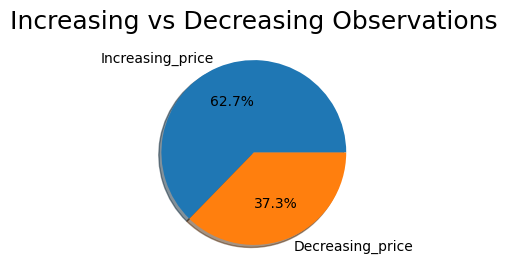

In [31]:
fig, ax = plt.subplots(figsize=(3,3))
plt.pie(x=[incr, decr], labels=['Increasing_price','Decreasing_price'], shadow=True, autopct='%1.1f%%')
plt.title('Increasing vs Decreasing Observations', fontsize=18)
plt.show()

There are 62.7% times SPX went up while 37.3% times it went down in our SPX500 dataset of 33+ years. If we were to bet on SPX 500 then we would be seeing 62.7% success. Our moldel will have to outperform SPX500 62.7%

#### Running RF Classifiers - preidct the 'target' variable -  S&P 500 would go up or down <a class="anchor" id="classifier"></a>
We are starting with classic supervised learning using Random Forest, a machine learning approach.

We are starting with Random Forest for time series forecasting. We will use backtesting technique to validate this model.

Thereafter, we will use walk-forward validation to simulate real market data for validating and training model.

We are simly starting with n_estimators of 100 and min sample split of 100 ( minimum number of nodes to split)

In [32]:
predictors = []
model = RandomForestClassifier ( n_estimators=100, min_samples_split=100,random_state=109)
train = sp500_monthly.iloc[:-200]
test = sp500_monthly.iloc[-197:]
predictors = ['volume','CPIAUCSL', 'FEDFUNDS','PERMIT','PPIACO','UMCSENT' ]  # removing predictors that are highly correlated with each other based on data analsysis
model.fit(train[predictors],train['target'])


RandomForestClassifier(min_samples_split=100, random_state=109)

In [33]:
from sklearn.metrics import precision_score

preds = pd.DataFrame(model.predict(test[predictors]))

In [34]:
precision_score(test['target'],preds)


0.6243654822335025

Model didn't perform better than S&P 500 index: 62.4% vs 62.7%

In [35]:
importances = model.feature_importances_
pd.Series(importances,predictors).sort_values(ascending=False)  # now all the variables have fair contribution in prediction

CPIAUCSL    0.220305
volume      0.202310
UMCSENT     0.181925
FEDFUNDS    0.146779
PPIACO      0.138774
PERMIT      0.109906
dtype: float64

S&P 500 had 62.7% of days in our dataset where the price went up during subsequent month.

Our model's precision_score of 62.4% is slightly lower than S&P mean so it doesn't make sense for us to use our mode.

So let's implement back test function to evaluate score next. Does it get better without multi-collinearity amongst predictors

There are 6 predictors that contribute to SPX500 prediction. The contribution by the percentage provides insight on which preditors are important.

#### Backtesting <a class="anchor" id="BT"></a>
Backtesting is the process of assessing the accuracy of a forecasting method using existing historical data. We start with 200 samples. These 250 points are used to train the model and we test in on next 25 data. We needed 250 datapoints to train the model. We iterate this in the step of 25 testin data until we exhause.
Backtest with timeseries data allows us to:
1. Incrementally train
2. Allows us to validate the model through different terrain

A word of caution. Past is not the future, so we can't assume and expect that all the future scenarios are covered.
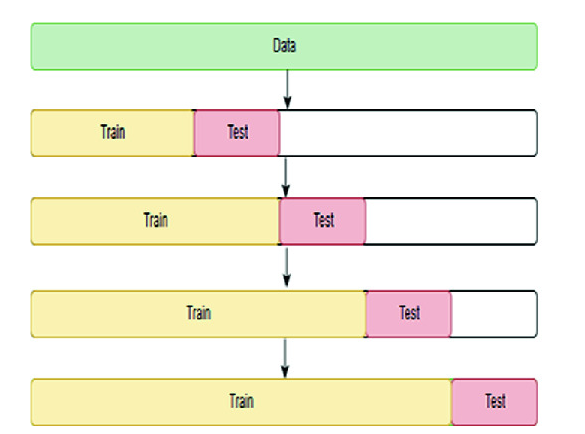

In [36]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index = test.index,name="Predictions")
    combined = pd.concat([test['target'],preds],axis=1)
    return combined


In [37]:
# function divides data into train/test. 
# Continually training data and testing against the remaining data in the dataset. 
# Starts with the start parameter validates predictions against actual data and continues.
def backtest(data,model,predictors,start=200,step=50):
    all_predictions = []
    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [38]:
predictions = backtest(sp500_monthly,model,predictors,start = 250, step = 25)


In [39]:
precision_score(predictions['target'],predictions['Predictions'])


0.64

It appears that the backtesting shows slight improvement over S&P 500: 64.7%


In [40]:
importances = model.feature_importances_
pd.Series(importances,predictors).sort_values(ascending=False)

volume      0.256413
UMCSENT     0.184138
CPIAUCSL    0.179736
FEDFUNDS    0.133838
PPIACO      0.130842
PERMIT      0.115033
dtype: float64

It is worth noting that the model with smaller backtesting approach now relies on volume more so than other predictors unlike without backtesting

#### Additional predictors <a class="anchor" id="AV"></a>

Now we will add additional predictors to see if the market is going up for the 18 mos. horizon. If so, it is likely that market may be due for downturn or flatline. We are adding mean close price over 18 mos. and ratio of closing price of start point and 18 mos. out.

In [41]:
if ( sp500_monthly.index.name != 'date'):
  sp500_monthly.set_index('date',inplace=True)


In [42]:
if ( 'Change %' in sp500_monthly.columns ):
  sp500_monthly.drop("Change %", axis=1,inplace = True)

Adding  rolling ratio and trend for 18 mos. horizon.  Our variables are not changing very rapidly, so looks like 18 months was best selection as smaller or larger horizon dominates in classification and predictions.

Close ratio is close price over rolling averages of close price ad trend is shifter by one month over rolling horizon

In [43]:
horizons = [18]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500_monthly.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    sp500_monthly[ratio_column] = sp500_monthly["close"] / rolling_averages["close"]
    
    trend_column = f"trend_{horizon}"
    sp500_monthly[trend_column] = sp500_monthly.shift(1).rolling(horizon).sum()["target"]
    
    new_predictors +=[ratio_column,trend_column]

In [44]:
#dropping nas that are created for the ration and trend for the first 2-3 months from dataframe
sp500_monthly = sp500_monthly.dropna()
sp500_monthly

,high,low,open,close,volume,adjclose,CPIAUCSL,FEDFUNDS,PERMIT,PPIACO,UMCSENT,target,close_ratio_18,trend_18
date,,,,,,,,,,,,,,
1991-07-01,387.809998,370.920013,371.179993,387.809998,3481570000,387.809998,136.200,5.82,973.0,116.100,82.9,1,1.112720,10.0
1991-08-01,396.820007,374.089996,387.809998,395.429993,3713820000,395.429993,136.600,5.66,944.0,116.200,82.0,1,1.123207,11.0
1991-09-01,397.619995,382.769989,395.429993,387.859985,3260990000,387.859985,137.000,5.45,974.0,116.100,83.0,0,1.093436,11.0
1991-10-01,393.809998,376.109985,387.859985,392.450012,4082380000,392.450012,137.200,5.21,991.0,116.400,78.3,1,1.095795,10.0
1991-11-01,398.220001,371.630005,392.459991,375.220001,3737620000,375.220001,137.800,4.81,984.0,116.400,69.1,0,1.045417,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,4119.279785,3584.129883,3936.729980,3585.620117,94241020000,3585.620117,296.539,2.56,1564.0,267.898,58.6,0,0.838337,11.0
2022-10-01,3905.419922,3491.580078,3609.780029,3871.979980,95823760000,3871.979980,297.987,3.08,1512.0,265.061,59.9,1,0.908940,10.0
2022-11-01,4080.110107,3698.149902,3901.790039,4080.110107,92671910000,4080.110107,298.598,3.78,1351.0,263.157,56.8,1,0.959350,10.0


In [45]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 109)

In [46]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>= 0.7] = 1  # choosing higher bar for predictions as we need to be very sure about it.
    preds[preds< 0.7] = 0
    preds = pd.Series(preds,index = test.index,name="Predictions")
    combined = pd.concat([test['target'],preds],axis=1)
    return combined

In [47]:
print(new_predictors)
print(predictors)

['close_ratio_18', 'trend_18']
['volume', 'CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO', 'UMCSENT']


In [48]:
#concatenating new predictors with close ratio and the trend we calculated for the past 2 and 3 months respectively

if 'target' not in new_predictors:
  new_predictors = predictors + new_predictors


In [49]:

preditions_new = backtest(sp500_monthly,model,new_predictors,start = 200, step = 25)
preditions_new["Predictions"].value_counts()


0.0    166
1.0     13
Name: Predictions, dtype: int64

In [50]:
precision_score(preditions_new['target'],preditions_new["Predictions"].astype(int))

0.7692307692307693

After selecting a longer horizon that matches with changes in other predictors, it is showing that other predictors are participating in predicting, and ultimately improves predictions. 

In [51]:
importances = model.feature_importances_
pd.Series(importances,new_predictors).sort_values(ascending = False)


close_ratio_18    0.344567
UMCSENT           0.156006
volume            0.117510
PPIACO            0.086659
CPIAUCSL          0.081901
FEDFUNDS          0.077815
PERMIT            0.068975
trend_18          0.066567
dtype: float64

In [52]:
print(classification_report(preditions_new['target'],preditions_new["Predictions"].astype(int)))

              precision    recall  f1-score   support

           0       0.39      0.96      0.55        67
           1       0.77      0.09      0.16       112

    accuracy                           0.41       179
   macro avg       0.58      0.52      0.35       179
weighted avg       0.63      0.41      0.31       179



As you can see, the precision score drastically improved, but the model is using close ratio of 18 mos, i.e., it is predicting based on historic trend. Since the S&P 500 is increasing 62% of time, these new columns weights are dominating in the predictions. It is doing remarkable of job of predicting the direction of S&P 500. This model with historical S&P 500 trends is not very useful for S&P 500 predictions. We need this further tested with smaller horizon

### Deep learning approach <a class="anchor" id="DL"></a>

In this part of the project, we employ a deep learning approach to enhance our time series forecasting, specifically focusing on various types of models, such as Feedforward Neural Networks (FNN), Recurrent Neural Networks (RNN), and Transformers.

We employ a simple Feedforward Neural Network (FNN) as our baseline model. Subsequently, we place particular emphasis on Recurrent Neural Networks (RNNs) and Transformer models, as they exhibit exceptional capabilities for time series forecasting tasks. RNNs, along with their variants such as Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU), are specifically designed to handle sequential data by maintaining a hidden state that encapsulates information from prior time steps. This intrinsic capacity to capture temporal dependencies renders RNNs an ideal choice for predicting the S&P 500 Index based on macroeconomic indicators. Conversely, Transformer models utilize self-attention mechanisms to assess the significance of various time steps within the input sequence, showcasing outstanding performance across diverse sequence-to-sequence tasks.

Our primary objective is to optimize our final model by pinpointing the most efficient neural network architecture.

In [53]:
# Load data
data = pd.read_csv('data/allData.csv')

# Key features and target
data = data[['CPIAUCSL', 'FEDFUNDS', 'PERMIT', 'PPIACO', 'UMCSENT', 'volume', 'target', 'date']]

In [54]:
# Setting the 'date' column as the index of df
data['Date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [55]:
data = data.drop(['Date'], axis=1)

In [56]:
data['target'] = data['target'].astype('float64')

In [57]:
# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [58]:
# Create sequences for time series data
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length), :-1]
        y = data[(i + seq_length), -1]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(data_scaled, seq_length)

In [59]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

In [60]:
# Define functions to create different deep learning models 

def create_simple_fnn_model():
    model = Sequential()
    model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_deep_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_simple_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_gru_model():
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_bidirectional_gru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(50), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(50), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_transformer_model():
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Multi-head self-attention layer
    attn_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=32)(inputs, inputs)
    attn_output = LayerNormalization()(attn_output + inputs)

    # Feed forward layer
    ff_output = Dense(64, activation='relu')(attn_output)
    ff_output = Dense(X_train.shape[2])(ff_output)
    ff_output = LayerNormalization()(ff_output + attn_output)

    # Final output
    output = Flatten()(ff_output)
    output = Dense(1, activation='sigmoid')(output)

    model = Model(inputs=inputs, outputs=output)
    return model

In [61]:
# Create 'models' dictionary

models = {
    "Simple FNN": create_simple_fnn_model(),
    "LSTM": create_lstm_model(),
    "Deep LSTM": create_deep_lstm_model(),
    "Simple RNN": create_simple_rnn_model(),
    "GRU": create_gru_model(),
    "Bidirectional GRU": create_bidirectional_gru_model(),
    "Bidirectional LSTM": create_bidirectional_lstm_model(),
    "Transformer": create_transformer_model(),
}

#### Training <a class="anchor" id="DL_TR"></a>

Below we train and evaluate our set of models. For each model in the "models" dictionary, we compile the model with 'binary_crossentropy' loss function, Adam optimizer, and accuracy metric; train the model on the training data for 50 epochs with a batch size of 32; evaluate the model on the test data; and store the accuracy and loss results in separate dictionaries. 

In [62]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging (1)
tf.get_logger().setLevel('ERROR')          # Suppress TensorFlow logging (2)
warnings.filterwarnings('ignore')          # Suppress other warnings

accuracy_results = {}
loss_results = {}

# Train and evaluate the models
for name, model in models.items():
    print(f"Training {name} model...")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    print(f"Evaluating {name} model...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_results[name] = accuracy

    loss_results[name] = loss

    print(f"{name} model accuracy: {accuracy:.4f}\n")
    print(f"{name} model loss: {loss:.4f}\n")


Training Simple FNN model...
Evaluating Simple FNN model...
Simple FNN model accuracy: 0.6234

Simple FNN model loss: 0.6664

Training LSTM model...
Evaluating LSTM model...
LSTM model accuracy: 0.6364

LSTM model loss: 0.6773

Training Deep LSTM model...
Evaluating Deep LSTM model...
Deep LSTM model accuracy: 0.6364

Deep LSTM model loss: 0.6788

Training Simple RNN model...
Evaluating Simple RNN model...
Simple RNN model accuracy: 0.6104

Simple RNN model loss: 0.6890

Training GRU model...
Evaluating GRU model...
GRU model accuracy: 0.6753

GRU model loss: 0.6445

Training Bidirectional GRU model...
Evaluating Bidirectional GRU model...
Bidirectional GRU model accuracy: 0.6494

Bidirectional GRU model loss: 0.6548

Training Bidirectional LSTM model...
Evaluating Bidirectional LSTM model...
Bidirectional LSTM model accuracy: 0.6234

Bidirectional LSTM model loss: 0.6833

Training Transformer model...
Evaluating Transformer model...
Transformer model accuracy: 0.5974

Transformer mode

In [63]:
# Compare the accuracy for all the models
print("Accuracy comparison:")
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.4f}")

Accuracy comparison:
Simple FNN: 0.6234
LSTM: 0.6364
Deep LSTM: 0.6364
Simple RNN: 0.6104
GRU: 0.6753
Bidirectional GRU: 0.6494
Bidirectional LSTM: 0.6234
Transformer: 0.5974


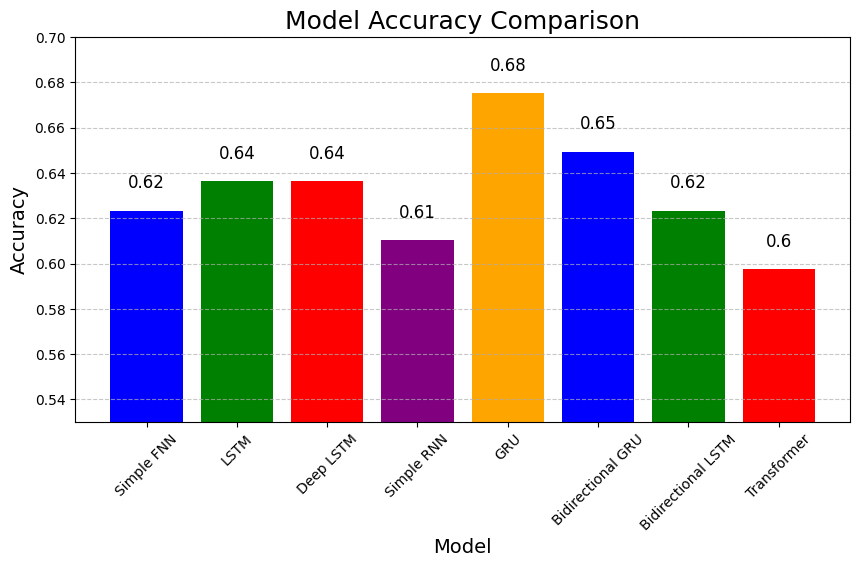

In [64]:
def plot_accuracy_comparison(accuracy_results):
    model_names = list(accuracy_results.keys())
    accuracies = list(accuracy_results.values())

    plt.figure(figsize=(10, 5))
    plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])  
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Model Accuracy Comparison', fontsize=18)
    plt.ylim(0.53, 0.7)  # Set the y-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7)  

    plt.xticks(rotation=45)

    for index, value in enumerate(accuracies):
        plt.text(index, value + 0.01, str(round(value, 2)), ha='center', fontsize=12)

    plt.show()

plot_accuracy_comparison(accuracy_results)

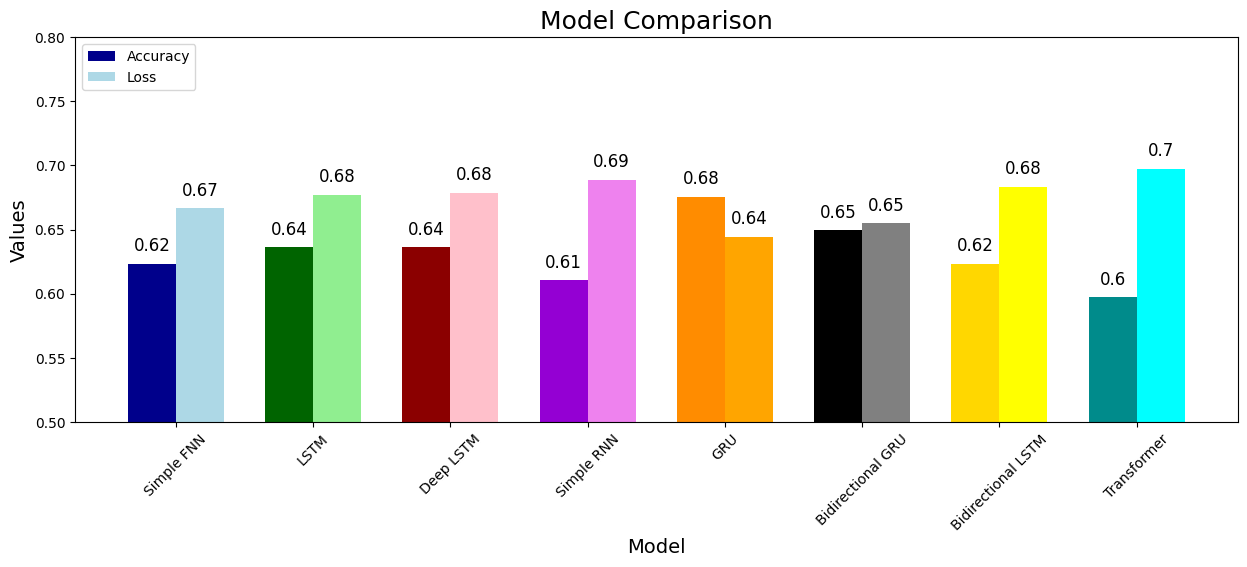

In [65]:
#import tkinter as tk

def plot_loss_comparison(accuracy_results, loss_results):
    model_names = list(loss_results.keys())
    accuracies = list(accuracy_results.values())
    losses = list(loss_results.values())

    # Set the bar width
    bar_width = 0.35

    # Set the index for each group of bars
    index = np.arange(len(model_names))

    # Set the color for each group of bars
    colors = ['darkblue', 'darkgreen', 'darkred', 'darkviolet', 'darkorange', 'black', 'gold', 'darkcyan']

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(15, 5))

    # Create the accuracy bars
    ax.bar(index, accuracies, bar_width, color=colors)

    # Create the loss bars
    loss_colors = ['lightblue', 'lightgreen', 'pink', 'violet', 'orange', 'grey', 'yellow', 'cyan']
    ax.bar(index + bar_width, losses, bar_width, color=loss_colors)

    # Set the x-axis labels
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(model_names, rotation=45)

    # Set the y-axis limits
    ax.set_ylim(0.5, 0.8)

    # Set the axis labels and title
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('Values', fontsize=14)
    ax.set_title('Model Comparison', fontsize=18)

    # Add a legend for the two bar groups
    ax.legend(['Accuracy', 'Loss'], loc='upper left')

    # Add values on top of each bar
    for i, (acc, loss) in enumerate(zip(accuracies, losses)):
        ax.text(i, acc + 0.01, str(round(acc, 2)), ha='center', fontsize=12)
        ax.text(i + bar_width, loss + 0.01, str(round(loss, 2)), ha='center', fontsize=12)

    plt.show()



plot_loss_comparison(accuracy_results, loss_results)

#### Key findings <a class="anchor" id="DL_KF"></a>

Our analysis has led us to conclude that the GRU neural network provides the most accurate predictions of the S&P 500 Index when considering a group of macroeconomic and technical indicators. The GRU model achieved an impressive accuracy rate of almost 68%, surpassing the accuracy of more complex models such as Deep LSTM (61%) and Transformer (66%). 

The GRU model's potential advantage in time series forecasting compared to Long Short-Term Memory (LSTM) and Transformer models stems from several factors. GRUs feature a simpler architecture than LSTMs, employing fewer gates, which can result in quicker training times and reduced computational complexity. 
Moreover, GRUs have demonstrated comparable performance to LSTMs in various sequence-to-sequence prediction tasks, suggesting that their streamlined architecture does not sacrifice predictive capabilities. 

In contrast to Transformers, GRUs are better equipped to handle long-range dependencies in time series data due to their innate sequential nature. Transformers depend on self-attention mechanisms that can struggle to capture dependencies in lengthy sequences, particularly when the data is noisy or contains complex patterns. As a result, the GRU model may provide a more efficient and effective solution for time series forecasting in specific scenarios.

### Statistical approach: Bayesian Model <a class="anchor" id="Bay"></a>


In [66]:
#Bayesian Model 

In [67]:

import copy
import random
import pickle


import arviz as az
import pymc as pm
from scipy.special import expit
from IPython.display import Markdown as md
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

databayes = pd.read_csv("data/allData.csv")
databayes = databayes[['CPIAUCSL',  'PERMIT', 'PPIACO', 'UMCSENT','FEDFUNDS', 'target']]

bayes_df = copy.deepcopy(databayes)

In [68]:
bayes_df

,CPIAUCSL,PERMIT,PPIACO,UMCSENT,FEDFUNDS,target
0,127.500,1748.0,114.900,93.0,8.23,0
1,128.000,1329.0,114.400,89.5,8.24,1
2,128.600,1246.0,114.200,91.3,8.28,1
3,128.900,1136.0,114.100,93.9,8.26,0
4,129.100,1067.0,114.600,90.6,8.18,1
...,...,...,...,...,...,...
392,296.539,1564.0,267.898,58.6,2.56,0
393,297.987,1512.0,265.061,59.9,3.08,1
394,298.598,1351.0,263.157,56.8,3.78,1
395,298.990,1337.0,257.921,59.7,4.10,0


In [69]:
bayes_train = bayes_df.iloc[1:199]
bayes_test = bayes_df.iloc[199:]

In [70]:
## for pymc model, have to make sure that the shape of the dataframes are the same
len(bayes_train) == len(bayes_test)

True

#### 1. The full bayesian model: using all important variables:  <a class="anchor" id="Full"></a>
$$
\begin{split}
\beta_{0} &\sim N(\mu_0,\sigma_0^2)\; \text{, with} \;\; \mu_0 \sim N(0,100)\; \text{and} \; \; \frac{1}{\sigma^2_0} \sim \text{Gamma}(0.1,0.1)
\\ \\
\beta_1 &\sim N(0,100) 
\\ \\ 
\beta_2 &\sim N(0,100)
\\ \\ 
\beta_3 &\sim N(0,100)
\\ \\
\beta_4 &\sim N(0,100)
\\ \\
\beta_5 &\sim N(0,100)
\\ \\
\end{split}
$$

Model for data:

$$
\begin{split}
Y_{i} & \sim \text{Bernoulli}(p_{i})
\\ \\
\text{logit}\:p_{i} &= \beta_{0} + \beta_1 \times \text{CPIAUCSL} + \beta_2 \times \text{FEDFUNDS} + \beta_3 \times \text{PERMIT} + \beta_4 \times \text{PPIACO} + \beta_5 \times \text{UMCSENT}
\\ \\
\end{split}
$$

Where $Y_{i}$ is 1 if target $i$ is greater, and 0 otherwise, and where $i \in \{1,...,N\}$ . $N$ is the number of observations in the data. The above notation assumes $N(\mu, \sigma^2)$ is a Normal distribution with mean $\mu$ and variance $\sigma^2$.

For the full bayesian model, the five variables, CPIAUCSL, FEDFUNDS, PERMIT, PPIACO and UMCSENT are used as covariates. 

The prior distribution of the outcome is bernoulli distribution, because the outcome variable, target, is a binary variable. The probability associated with outcome variable = 1 is pi, which is going to be modeled using logistic regression. 

For both bayesian models, the prior distribution of the intercept is modeled by normal distribution, with mean at 0 and the inverse of variance modeled using gamma distribution, which are common choices for modeling the intercept. 
 the prior distirbutions for the β coefficients of all the covariates are normal distribution, with mean centered around 0 and standard deviation of 10. The choices of the standard deviation are made based on the summary statistics of the 5 covariates, that their sds are at scales of tens. The choice of means at 0 is because the covariates might contribute positively or negatively to the outcome variable. 

In [71]:
#First we build the full bayes model using all important variables
with pm.Model() as model_bayes:
    
    x = pm.MutableData('x', bayes_train.drop(columns = 'target'))
    y = pm.MutableData('y', bayes_train['target'])
    # Hyperpriors for beta0
    mu0 = pm.Normal('mu_0', mu=0., sigma=100)
    
    #question1: shall we really do sigma like this
    inverse_sigma_0_square = pm.Gamma('tau_0', alpha = 0.1, beta = 0.1)
    sigma0 = pm.Deterministic('sigma_0', 1/np.sqrt(inverse_sigma_0_square) )
    
    # PRIORS
    # common priors for all variables
    b0 = pm.Normal('b0', mu=mu0, sigma=sigma0)   
    b1 = pm.Normal('b1', mu=0, sigma=100)
    b2 = pm.Normal('b2', mu=0, sigma=100)
    b3 = pm.Normal('b3', mu=0, sigma=100)
    b4 = pm.Normal('b4', mu=0, sigma=100)
    b5 = pm.Normal('b5', mu=0, sigma=100)
    
    # single binary predictor
    
    
    CPIAUSCSL = bayes_train['CPIAUCSL'].values
    FEDFUNDS = bayes_train['FEDFUNDS'].values
    PERMIT = bayes_train['PERMIT'].values
    PPIACO = bayes_train['PPIACO'].values
    UMCSENT = bayes_train['UMCSENT'].values
    # linear relationship between predictor
    # and the mean of the random variable y (log radon) 
    logitp = b0 + b1 * CPIAUSCSL + b2 * FEDFUNDS + b3 * PERMIT + b4 * PPIACO + b5* UMCSENT
        
    # LIKELIHOOD
    Y = pm.Bernoulli('Y',
                  logit_p = logitp,
                  observed=y) 

In [72]:

#training this model takes ~1.5 hours
#with model_bayes:
#    trace0 = pm.sample(3000, tune=10000, target_accept=.99, chains=3)

In [73]:
#with open('trace0.pkl', 'wb') as f:
#  pickle.dump(trace0, f)

In [74]:
#use the pre-trained trace for the model: 
with open('data/trace0.pkl', 'rb') as f:
    trace0= pickle.load(f)

In [75]:

#below is the summary of the parameters generated by the first bayesian model:
posterior0 = pm.summary(trace0)
posterior0

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_0,-2.239,29.288,-51.714,50.984,0.905,0.650,1457.0,985.0,1.0
b0,-1.454,3.188,-7.544,4.545,0.059,0.041,2969.0,3728.0,1.0
b1,-0.062,0.036,-0.128,0.007,0.001,0.000,2894.0,3882.0,1.0
b2,-0.238,0.144,-0.505,0.031,0.003,0.002,2712.0,4065.0,1.0
b3,-0.001,0.002,-0.004,0.002,0.000,0.000,3270.0,3857.0,1.0
b4,0.088,0.044,0.008,0.172,0.001,0.001,2276.0,3276.0,1.0
b5,0.032,0.024,-0.013,0.077,0.000,0.000,2382.0,3659.0,1.0
tau_0,1.559,3.843,0.000,7.486,0.075,0.053,709.0,1452.0,1.0
sigma_0,37.441,252.797,0.140,100.787,5.034,3.560,709.0,1452.0,1.0


The samplers look converged, because the traces of plots after the tuning period overlap with each other, which means that the chains converge. In addition, the R hat values of the parameters, which computes a ratio of between-chain variance and within-chain variance, are all equal to 1, meaning that the convergence is reached.

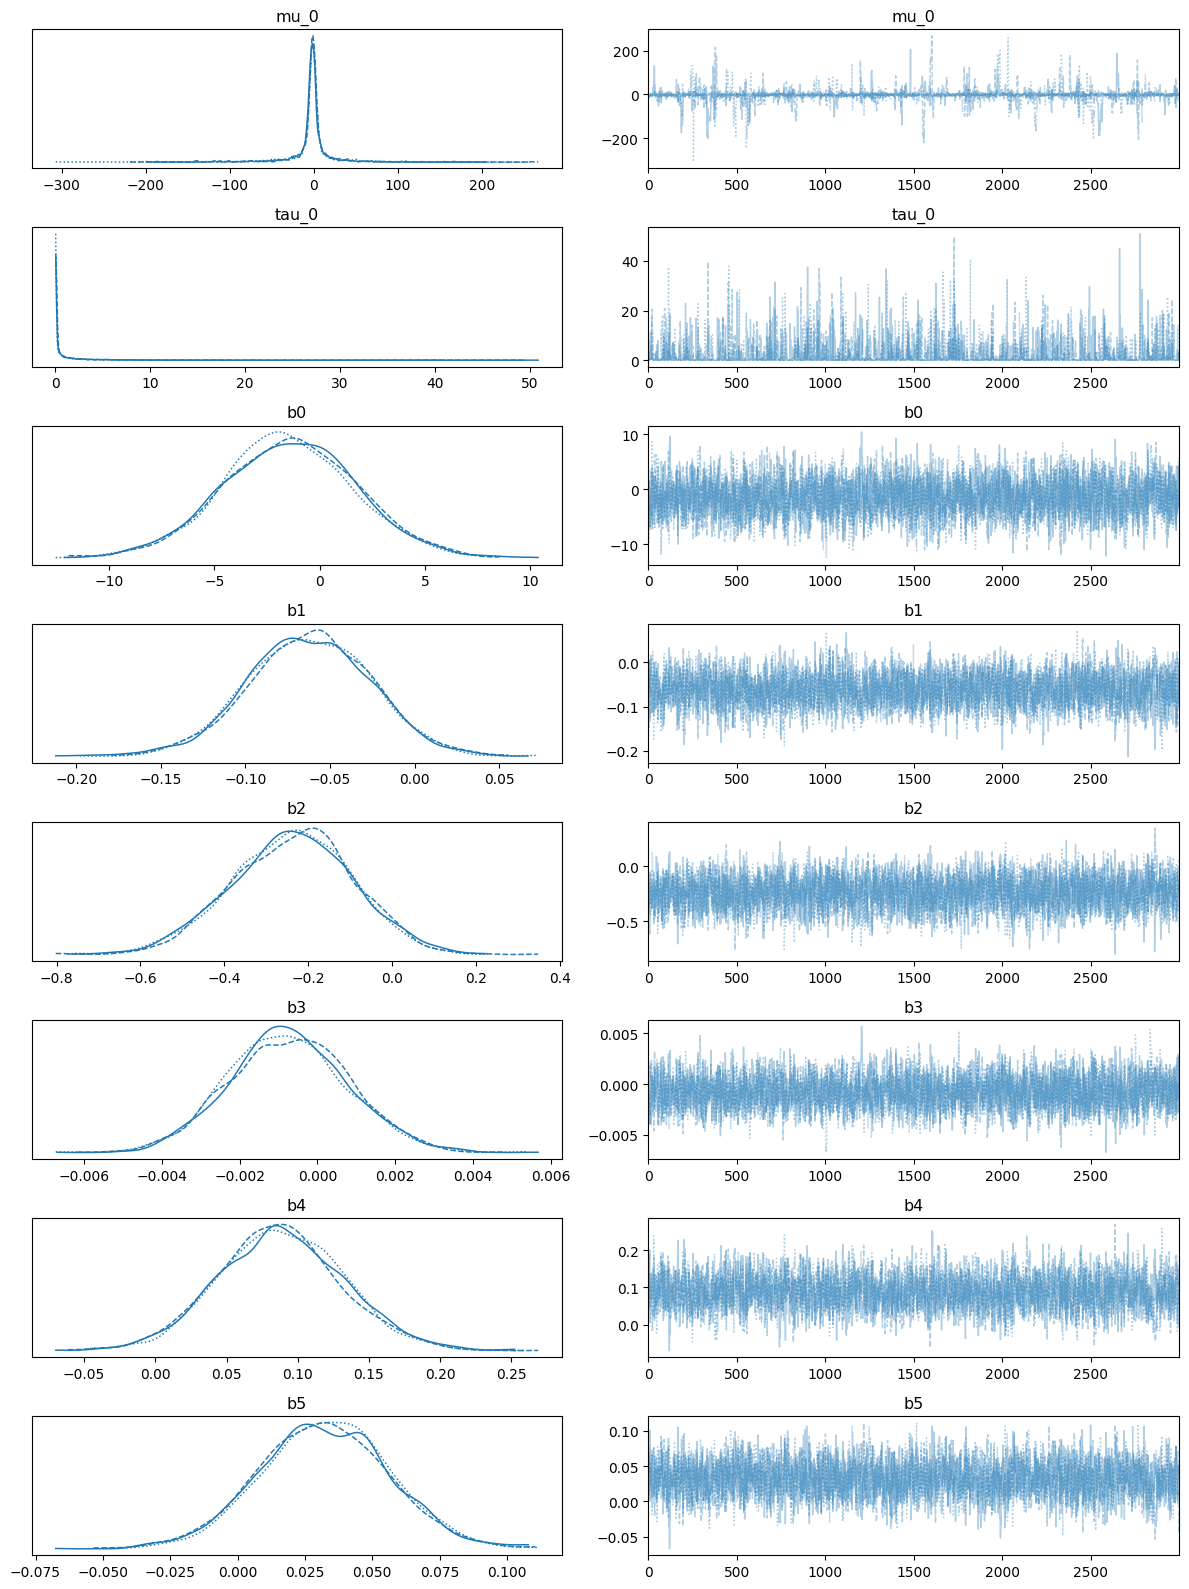

In [76]:
#here is the convergence plot for all the parameters of the first bayesian model

pm.plot_trace(trace0, var_names=['mu_0','tau_0','b0','b1' ,'b2', 'b3', 'b4', 'b5'])
plt.tight_layout();

In [77]:
#
train_pred_trace = pm.sample_posterior_predictive(trace0, model=model_bayes)

pos_per0_train = []
acc0_train= []
y_train = train_pred_trace['observed_data']['Y']
for i in range(len(train_pred_trace['posterior_predictive']['Y'])):
    for j in range(len(train_pred_trace['posterior_predictive']['Y'][i])):
        y_pred = np.array(train_pred_trace['posterior_predictive']['Y'][i][j])
        acc0_train.append(accuracy_score(y_train, y_pred))
        pos_per0_train.append(sum(y_pred)/len(y_train))
        print(j/3000*100, end="\r")
pos_per_avg0_train = sum(pos_per0_train)/len(pos_per0_train)
acc_avg0_train = sum(acc0_train)/len(acc0_train)
print('Bayesian full model on train data - percentage of observations predicted to be 1:', pos_per_avg0_train)
print('Bayesian full model on train data - accuracy score:', acc_avg0_train)


Bayesian full model on train data - percentage of observations predicted to be 1: 0.6322659932659872
Bayesian full model on train data - accuracy score: 0.546745230078552


In [78]:


X_test = bayes_test.drop(columns = 'target')
y_test = bayes_test.target


with model_bayes:
    pm.set_data({'x':X_test, 'y':y_test})
    test_pred_trace = pm.sample_posterior_predictive(trace0, model = model_bayes)



pos_per0_test = []
acc0_test= []
y_test = train_pred_trace['observed_data']['Y']
for i in range(len(train_pred_trace['posterior_predictive']['Y'])):
    for j in range(len(train_pred_trace['posterior_predictive']['Y'][i])):
        y_pred = np.array(train_pred_trace['posterior_predictive']['Y'][i][j])
        acc0_test.append(accuracy_score(y_test, y_pred))
        pos_per0_test.append(sum(y_pred)/len(y_test))
        print(j/3000*100, end="\r")
pos_per_avg0_test = sum(pos_per0_test)/len(pos_per0_test)
acc_avg0_test = sum(acc0_test)/len(acc0_test)
print('Bayesian full model on test data - percentage of observations predicted to be 1:', pos_per_avg0_test)
print('Bayesian full model on test data - accuracy score:', acc_avg0_test)


Bayesian full model on test data - percentage of observations predicted to be 1: 0.6322659932659872
Bayesian full model on test data - accuracy score: 0.546745230078552


#### 2. The reduced bayesian model: using 3 top correlated variables:  <a class="anchor" id="Few"></a>

Now, since CPIAUCSL, PERMIT and UMCSENT are the three variables that are most strongly correlated to the close price of stock, another bayesian model with these three variables is fitted on the same train and test sets, to compare with the full bayesian model. If the accuracies are similar, that will support the . Otherwise, the two less correlated variables would still play 

In [79]:
with pm.Model() as model_bayes_fewer:
    
    x = pm.MutableData('x', bayes_train.drop(columns = 'target'))
    y = pm.MutableData('y', bayes_train['target'])
    # Hyperpriors for beta0
    mu0 = pm.Normal('mu_0', mu=0., sigma=100)
    
    #question1: shall we really do sigma like this
    inverse_sigma_0_square = pm.Gamma('tau_0', alpha = 0.1, beta = 0.1)
    sigma0 = pm.Deterministic('sigma_0', 1/np.sqrt(inverse_sigma_0_square) )
    
    # PRIORS
    # common priors for all variables
    b0 = pm.Normal('b0', mu=mu0, sigma=sigma0)   
    b1 = pm.Normal('b1', mu=0, sigma=100)
    b2 = pm.Normal('b2', mu=0, sigma=100)
    b3 = pm.Normal('b3', mu=0, sigma=100)
    
    
    # single binary predictor
    
    
    CPIAUSCSL = bayes_train['CPIAUCSL'].values
    
    PERMIT = bayes_train['PERMIT'].values
   
    UMCSENT = bayes_train['UMCSENT'].values

    # linear relationship between predictor
    # and the mean of the random variable y (log radon) 
    logitp = b0 + b1 * CPIAUSCSL + b2 * PERMIT + b3 * UMCSENT
        
    # LIKELIHOOD
    Y = pm.Bernoulli('Y',
                  logit_p = logitp,
                  observed=y) 

In [80]:
# again, use the pre-trained trace of the model 
with open('data/trace1.pkl', 'rb') as f:
    trace1= pickle.load(f)

In [81]:
train_pred_trace = pm.sample_posterior_predictive(trace1, model=model_bayes_fewer)
pos_per2 = []
acc2 = []
y_train = train_pred_trace['observed_data']['Y']
for i in range(len(train_pred_trace['posterior_predictive']['Y'])):
    for j in range(len(train_pred_trace['posterior_predictive']['Y'][i])):
        y_pred = np.array(train_pred_trace['posterior_predictive']['Y'][i][j])
        acc2.append(accuracy_score(y_train, y_pred))
        pos_per2.append(sum(y_pred)/len(y_train))
        print(j/3000*100, end="\r")
pos_per_avg2 = sum(pos_per2)/len(pos_per2)
acc_avg2 = sum(acc2)/len(acc2)
print('model 1 on train data - percentage of observations predicted to be 1:', pos_per_avg2)
print('model 1 on train data - accuracy score:', acc_avg2)

model 1 on train data - percentage of observations predicted to be 1: 0.6307048260381549
model 1 on train data - accuracy score: 0.5361178451178354


In [82]:
X_test = bayes_test.drop(columns = 'target')
y_test = bayes_test.target


with model_bayes_fewer:
    pm.set_data({'x':X_test, 'y':y_test})
    test_pred_trace = pm.sample_posterior_predictive(trace1, model = model_bayes_fewer)


pos_per2 = []
acc2 = []
y_test = test_pred_trace['observed_data']['Y']
for i in range(len(test_pred_trace['posterior_predictive']['Y'])):
    for j in range(len(test_pred_trace['posterior_predictive']['Y'][i])):
        y_pred = np.array(test_pred_trace['posterior_predictive']['Y'][i][j])
        acc2.append(accuracy_score(y_test, y_pred))
        pos_per2.append(sum(y_pred)/len(y_test))
        print(j/3000*100, end="\r")
pos_per_avg2 = sum(pos_per2)/len(pos_per2)
acc_avg2 = sum(acc2)/len(acc2)
print(' model 1 on test data - percentage of observations predicted to be 1:', pos_per_avg2)
print('model 1 on test data - accuracy score:', acc_avg2)

 model 1 on test data - percentage of observations predicted to be 1: 0.6310774410774372
model 1 on test data - accuracy score: 0.5316509539842788


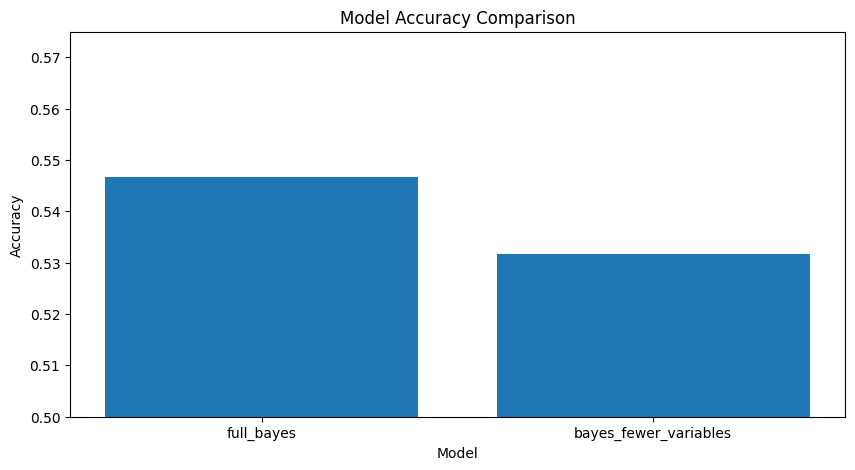

In [83]:
accuracy_bayes = {}
accuracy_bayes['full_bayes'] = acc_avg0_test
accuracy_bayes['bayes_fewer_variables'] = acc_avg2

def plot_accuracy_comparison(accuracy_bayes):
    model_names = list(accuracy_bayes.keys())
    accuracies = list(accuracy_bayes.values())

    plt.figure(figsize=(10, 5))
    plt.bar(model_names, accuracies)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0.5, 0.575)  # Set the y-axis limits
    plt.show()

plot_accuracy_comparison(accuracy_bayes)

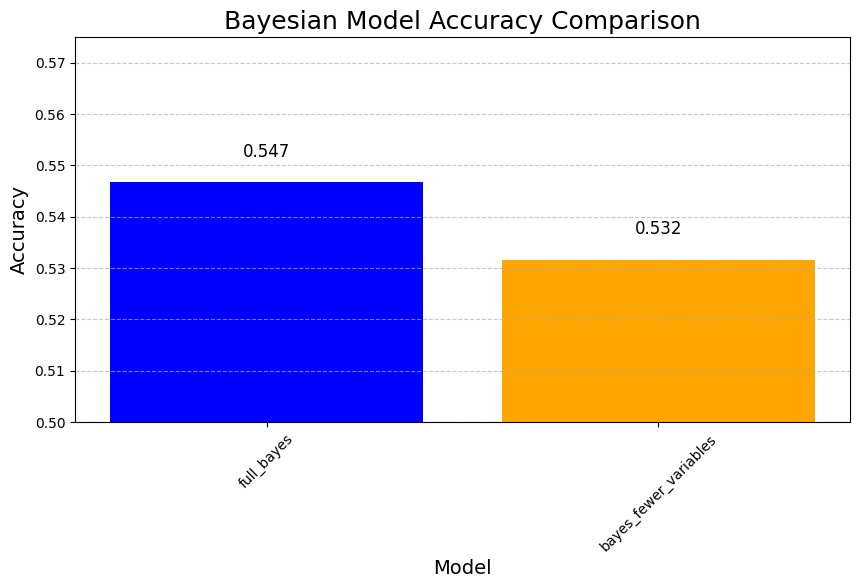

In [84]:
def plot_accuracy_comparison(accuracy_bayes):
    model_names = list(accuracy_bayes.keys())
    accuracies = list(accuracy_bayes.values())

    plt.figure(figsize=(10, 5))
    plt.bar(model_names, accuracies, color=['blue', 'orange'])  
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Bayesian Model Accuracy Comparison', fontsize=18)
    plt.ylim(0.5, 0.575)  # Set the y-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7) 

    # Rotate x-axis tick labels
    plt.xticks(rotation=45)

    # Add data labels
    for index, value in enumerate(accuracies):
        plt.text(index, value + 0.005, str(round(value, 3)), ha='center', fontsize=12)

    plt.show()

plot_accuracy_comparison(accuracy_bayes)

From the model accuracy comparison we can see that the full bayesian model is doing a better job in terms of fitting the model. This is likely because although FEDFUNDS and PPIACO are not directly correlated with the closing price of the stock, they could still be strong indicators of direction of stock price change, and their prediction power should be addressed in the model. 

However, overall, bayesian models aren't powerful enough to predict the changes in stock prices. One reason is that Bayesian models can be computationally intensive, especially when dealing with complex models or large datasets. This can make them slower to train and evaluate than some machine learning methods, which can lead to longer development times.

Another reason is that Bayesian models rely heavily on prior knowledge and assumptions about the underlying data-generating process. If these assumptions are incorrect or misspecified, the resulting Bayesian model may perform poorly in prediction. In contrast, machine learning methods can often learn directly from the data without relying on explicit assumptions about the data-generating process, which can make them more flexible and robust in certain situations.

However, Bayesian models also have some advantages over machine learning methods. For example, Bayesian models can provide probabilistic predictions and uncertainty estimates, which can be useful in many applications. They can also handle missing data and incorporate prior knowledge in a principled way, which can lead to more accurate predictions in certain scenarios.


##Results:<a class="anchor" id="Results"></a>


We can see that the machine learning model of random forest predicts well in the case when the stock price goes down, but performs poorly when the stock price goes up. This result indicates that simple machine learning models are not the optimal model here. 

As for the deep neural network models, 

The GRU model achieved an impressive accuracy rate of almost 68%, surpassing the accuracy of more complex models such as Bidirectional GRU, Deep LSTM  and Transformer . 
Looking at the model losses, the GRU model also has the least loss at the value of 0.64.

As for statistical models like bayesian models, 
, the full bayesian model with all 5 covariates achieve higher accuracy, at the value of 0.54 , as compared to the reduced bayesian model with three covariates. 
However, statistical models are in general performing worse than the deep learning models, suggesting that deep learning models like GRU are the best choices

##Conclusion & Inferences:<a class="anchor" id="Conc"></a>

Our analysis led to the conclusion that the GRU neural network provides the most accurate predictions of the S&P 500 Index when considering a group of macroeconomic and technical indicators. 
This is likely because,  GRU networks are very good at feature extraction and can automatically extract relevant features from the input data, which can be important for predicting binary outcomes in the stock market. 

In addition GRU networks can model nonlinear relationships between input features and binary outcomes, which can be important in the context of the stock market where relationships between features and outcomes can be complex and nonlinear.


## Future Work/ Scope of improvement<a class="anchor" id="FW"></a>
Our GRU model is certainly showing better performance than betting on SPX500. We need to continue to test and train this model for more use cases to see if model can withstand other unpredictable dynamics.

S&P 500 has weighted price of 500 US companies. We need to add additional variable to track change in performance indicator of one or mode company of industry. There is further research warranted.

Snetiment analysis - Therer is a explosion of social media data. We can take advantage of that to exploit short-term market inefficiency driven by sentiment.

Lastly, there is an opportunity to predict daily performance rather than wait for a month. Market is efficient over long-term so we may not win by a lot. Predicting daily or weekly could provide opportunity to day trade or option market


In [85]:
time_end = time.time()
print(f"It took {(time_end - time_start)/60:.2f} minutes for this notebook to run")

It took 3.63 minutes for this notebook to run
